In [1]:
%pip install scipy==1.8.0

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random
from matplotlib.pyplot import title
from numpy import linalg as LA

# Functions

In [5]:
num_graphs = 4 # Total groups we have (G_ii)
betw_graphs = num_graphs*(num_graphs-1)/2 # Graphs needed to represent interlayer relations (G_ij, i!=j)

def generate_mat(n, p_inter, p_intra):
    # Generating intralayer relations graphs
    G_11 = nx.erdos_renyi_graph(n, p_intra)
    G_22 = nx.erdos_renyi_graph(n, p_intra)

    # Generating interlayer relations graphs
    G_12 = nx.erdos_renyi_graph(n, p_inter)
    G_21 = nx.erdos_renyi_graph(n, p_inter)

    # Adding random weights to our grpahs
    
    for (u, v) in G_11.edges():
        G_11.edges[u,v]['weight'] = (random.randint(0,10) - 5)/10

    for (u, v) in G_22.edges():
        G_22.edges[u,v]['weight'] = (random.randint(0,10) - 5)/10
    A11 = nx.to_numpy_array(G_11)
    A12 = nx.to_numpy_array(G_12)
    A21 = nx.to_numpy_array(G_21)
    A22 = nx.to_numpy_array(G_22)

    return G_11, G_12, G_21, G_22, A11, A12, A21, A22



def plot_graph(G):
    elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0]
    esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0]

    pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=1)

    # edges
    nx.draw_networkx_edges(G, pos, edgelist=elarge, edge_color="b", width=0.1)
    nx.draw_networkx_edges(
        G, pos, edgelist=esmall, width=0.1, alpha=0.5, edge_color="r", style="dashed"
    )

    # node labels
    nx.draw_networkx_labels(G, pos, font_size=1, font_family="sans-serif")
    # edge weight labels
    # edge_labels = nx.get_edge_attributes(G, "weight")
    # nx.draw_networkx_edge_labels(G, pos, edge_labels)

    ax = plt.gca()
    ax.margins(0.08)
    plt.axis("off")
    plt.tight_layout()
    plt.title('For '+str(G))
    plt.show()


def plot(G):
    pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility
    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=1)

    # edges
    nx.draw_networkx_edges(G, pos, width=0.1)
    nx.draw_networkx_edges(
        G, pos, width=0.1, alpha=0.5, edge_color="b"
    )

    # node labels
    nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")

    ax = plt.gca()
    ax.margins(0.08)
    plt.axis("off")
    plt.tight_layout()
    plt.title('For '+str(G))
    plt.show()




def compute_max_2l(A11, A12, A21, A22):
    temp1 = np.hstack((A11, A12))
    temp2 = np.hstack((A21, A22))
    A = np.vstack((temp1, temp2))

    eig_A11 = abs(LA.eigvals(A11))
    eig_A22 = abs(LA.eigvals(A22))
    eig_A = abs(LA.eigvals(A))
    
    max_A11, min_A11 = np.max(eig_A11), np.min(eig_A11)
    max_A22, min_A22 = np.max(eig_A22), np.min(eig_A22)
    max_A = np.max(eig_A)
    
    return max_A11, min_A11, max_A22, min_A22, max_A


def compute_max_3l(A11, A12, A13, A21, A22, A23, A31, A32, A33):
    temp1 = np.hstack((A11, A12, A13))
    temp2 = np.hstack((A21, A22, A23))
    temp3 = np.hstack((A31, A32, A33))
    A = np.vstack((temp1, temp2, temp3))

    eig_A11 = abs(LA.eigvals(A11))
    eig_A22 = abs(LA.eigvals(A22))
    eig_A33 = abs(LA.eigvals(A33))
    eig_A = abs(LA.eigvals(A))
    
    max_A11, min_A11 = np.max(eig_A11), np.min(eig_A11)
    max_A22, min_A22 = np.max(eig_A22), np.min(eig_A22)
    max_A33, min_A33 = np.max(eig_A33), np.min(eig_A33)
    max_A = np.max(eig_A)
    
    return max_A11, min_A11, max_A22, min_A22, max_A33, min_A33, max_A

# Erdos-Renyi multilayer graphs

In [5]:
G_11, G_12, G_21, G_22, A11, A12, A21, A22 = generate_mat(50, 0.05, 0.7)

In [ ]:
plot_graph(G_11)
plot_graph(G_22)
plot(G_12)
plot(G_21)

## Ideas:


*   We can try different types of networks, ER -> SF -> ...
*   We can try different variables of each network type, namely p_intra and p_inter
*   We can plot max_A, max_A11, and max_A22 to see how they behave



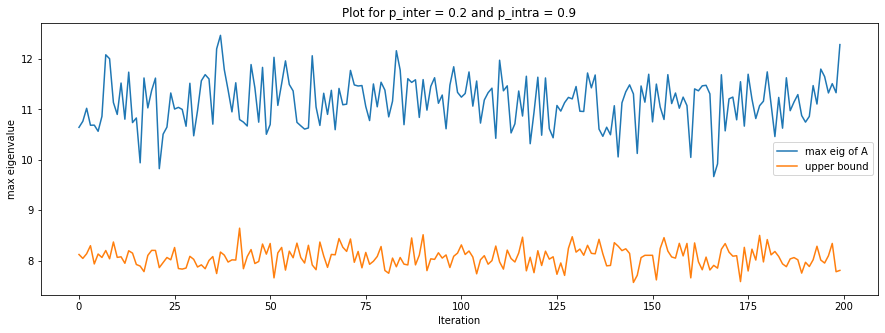

In [6]:
# plotting max_A, max_A11, and max_A22 to see their behavior

p_inter_list = [0.12]
p_intra_list = [0.5, 0.6, 0.7, 0.8, 0.9]

for p_intra in p_intra_list:

    for p_inter in p_inter_list:
        list_A = []
        list_A11 = []
        list_A22 = []
        list_comb_max = []
        list_comb_min = []

        for i in range(500):
            # generating 100 ER graphs with 50 nodes and p_intra = 0.7 and p_inter = 0.05
            G_11, G_12, G_21, G_22, A11, A12, A21, A22 = generate_mat(50, p_inter, p_intra)
            max_A11, min_A11, max_A22, min_A22, max_A = compute_max_2l(A11, A12, A21, A22)
            list_A.append(max_A)
            list_A11.append(max_A11)
            list_A22.append(max_A22)
            list_comb_max.append(max_A11 + max_A22)
            list_comb_min.append(min_A11 + min_A22)

        plt.figure(figsize=(15,5))
        plt.plot(list_A, label='max eig of A')
        # plt.plot(list_A11, label='max eig of A11')
        # plt.plot(list_A22, label='max eig of A22')
        plt.plot(list_comb_max, label='upper bound')
        # plt.plot(list_comb_min, label='lower bound')
        plt.xlabel('Iteration')
        plt.ylabel('max eigenvalue')
        plt.title('Plot for p_inter = ' + str(p_inter) + ' and p_intra = ' + str(p_intra))
        plt.legend()
        # plt.savefig('Plot for p_inter = ' + str(p_inter) + ' and p_intra = ' + str(p_intra) + '.png')
        plt.show()

# The difference between the eigenvalues of A and A11 or A22 only depends on p_intrer. The higher p_inter, the bigger the difference.

# Multiplex networks

## Functions for generating multiplex networks

In [7]:
def generate_multiplex_2l(n):
  # Generate intralayer matrices:
  A11 = np.random.rand(n, n) - 0.5
  A22 = np.random.rand(n, n) - 0.5
  for i in range(n):
      
      t1 = 0.05
      t2 = 0.1

      for j in range(n):
        if abs(A11[i][j]) < t1:
          A11[i][j] = 0
        elif abs(A22[i][j]) < t2:
          A22[i][j] = 0
        
      A11[i][i] = 0
      A22[i][i] = 0
      
  # Generate interlayer matrices:
  A12, A21 = np.identity(n), np.identity(n)
  return A11, A12, A21, A22

def generate_multiplex_3l(n):
  # Generate intralayer matrices:
  A11 = np.random.rand(n, n) - 0.5
  A22 = np.random.rand(n, n) - 0.5
  A33 = np.random.rand(n, n) - 0.5
  for i in range(n):
      
      t1 = 0.05
      t2 = 0.1
      t3 = 0.2

      for j in range(n):
        if abs(A11[i][j]) < t1:
          A11[i][j] = 0
        elif abs(A22[i][j]) < t2:
          A22[i][j] = 0
        elif abs(A33[i][j]) < t3:
          A33[i][j] = 0
      
      A11[i][i] = 0
      A22[i][i] = 0
      A33[i][i] = 0
      
  # Generate interlayer matrices:
  A12, A13, A21, A23, A31, A32 = np.identity(n), np.identity(n), np.identity(n), np.identity(n), np.identity(n), np.identity(n)
  return A11, A12, A13, A21, A22, A23, A31, A32, A33


def generate_multiplex_4l(n):
  # Generate intralayer matrices:
  A11 = np.random.rand(n, n) - 0.5
  A22 = np.random.rand(n, n) - 0.5
  A33 = np.random.rand(n, n) - 0.5
  A44 = np.random.rand(n, n) - 0.5
  for i in range(n):
      
      t1 = 0.05
      t2 = 0.1
      t3 = 0.2
      t4 = 0.3

      for j in range(n):
        if abs(A11[i][j]) < t1:
          A11[i][j] = 0
        elif abs(A22[i][j]) < t2:
          A22[i][j] = 0
        elif abs(A33[i][j]) < t3:
          A33[i][j] = 0
        elif abs(A44[i][j]) < t3:
          A44[i][j] = 0
      A11[i][i] = 0
      A22[i][i] = 0
      A33[i][i] = 0
      A44[i][i] = 0
      
  # Generate interlayer matrices:
  I = np.identity(n)
  A12, A13, A14, A21, A23, A24, A31, A32, A34, A41, A42, A43 = I, I, I, I, I, I, I, I, I, I, I, I
  return A11, A12, A13, A14, A21, A22, A23, A24, A31, A32, A33, A34, A41, A42, A43, A44

## Plots and results for 3 layers

In [10]:
A11, A12, A13, A21, A22, A23, A31, A32, A33 = generate_multiplex_3l(50)

In [ ]:
G11, G22, G12, G21 = nx.to_networkx_graph(A11), nx.to_networkx_graph(A22), nx.to_networkx_graph(A12), nx.to_networkx_graph(A21)
plot_graph(G11)
plot_graph(G22)
plot_graph(G12)
plot_graph(G21)

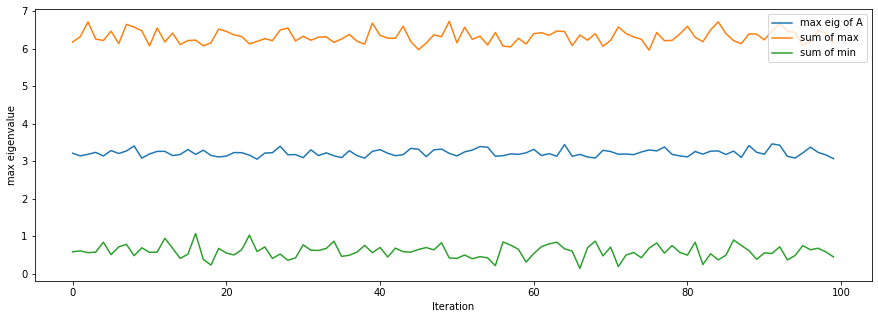

In [27]:
list_A = []
list_A11 = []
list_A22 = []
list_A33 = []
list_comb_max = []
list_comb_min = []
diff1 = []
diff2 = []

for i in range(100):
    # generating 100 multiplex networks with 50 nodes in each layer (for 3 layers)
    A11, A12, A13, A21, A22, A23, A31, A32, A33 = generate_multiplex_3l(50)
    max_A11, min_A11, max_A22, min_A22, max_A33, min_A33, max_A= compute_max_3l(A11, A12, A13, A21, A22, A23, A31, A32, A33)
    list_A.append(max_A)
    list_A11.append(max_A11)
    list_A22.append(max_A22)
    list_A33.append(max_A33)
    comb_max = (max_A11 + max_A22 + max_A33)
    comb_min = (min_A11 + min_A22 + min_A33)
    list_comb_max.append(comb_max)
    list_comb_min.append(comb_min)


plt.figure(figsize=(15,5))
plt.plot(list_A, label='max eig of A')
# plt.plot(list_A11, label='max eig of A11')
# plt.plot(list_A22, label='max eig of A22')
# plt.plot(list_A33, label='max eig of A33')
plt.plot(list_comb_max, label='sum of max')
plt.plot(list_comb_min, label='sum of min')
plt.xlabel('Iteration')
plt.ylabel('max eigenvalue')
plt.legend(loc='upper right')
plt.show()